

# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For this project I have chosen to look at the TMDB dataset. This data was provided as part of the Udacity Data Analysis Nanodegree and originated from Kaggle.
>
>Questions:
>1. Which genres are most popular from year to year?
>2. Distribution of Popularity in Different Revenue Levels in Recent Five Years
>3. Top Movies Based on their Revenue
>4. Movies with longest and shortest runtime values

In [1]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Explore General Properties of the Dataset

### Reading the Data:

In [2]:
# Load your data

data = pd.read_csv('tmdb-movies.csv')

In [3]:
#printing first five rows with defined columns of tmdb-movies database
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the table above, there are totally 10866 entries and total 21 columns. Each data format is reasonable, and there exists some null value in the imdb_id, cast, director, overview and genres columns, but just in tiny amounts, so I decided to drop them. However, some columns are with a lot of null values like homepage, tagline, keywords and production_companies, especially the homepage and tagline column are even not necessary for answering the questions, so I decide to drop both of the columns at this stage, and kept the keywords and production_companies.

In [5]:
for_rows=['imdb_id','cast','director','overview','genres']
data.dropna(subset=for_rows, inplace=True)

In [6]:
columns=['homepage','tagline']
data.drop(columns, axis=1, inplace=True)

In [7]:
#explore dataset
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10725.000000,10725.000000,1.072500e+04,1.072500e+04,10725.000000,10725.000000,10725.000000,10725.000000,1.072500e+04,1.072500e+04
mean,65182.327925,0.652852,1.481473e+07,4.034253e+07,102.502471,219.933054,5.964317,2001.255012,1.777804e+07,5.203541e+07
std,91470.421976,1.005025,3.107129e+07,1.176814e+08,30.458857,578.955633,0.930166,12.822147,3.447315e+07,1.454606e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.000000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20309.000000,0.387304,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.000000,0.721548,1.600000e+07,2.500526e+07,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.476553e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

In this part a trivial data cleaning will be performed. 

In [8]:
#removing rows where revenue_adj and budget_adj is equal to zero

data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

>### Removing the duplicacy in the rows(if any).
>
>Lets see how many entries we have in the database

In [9]:
rows,col=data.shape
print('There are {} total entries of movies and {} no. of columns in it.'.format(rows, col))

There are 3850 total entries of movies and 19 no. of columns in it.


>Now removing the duplicate rows if any!

In [10]:
data.drop_duplicates(inplace=True)
rows, col = data.shape
print('There are now {} total entries of movies and {} no. of columns in it.'.format(rows, col))

There are now 3849 total entries of movies and 19 no. of columns in it.


>So there was a duplicate row and it has been removed now.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genres are most popular from year to year?

In this section we will look to address the question: "Which genres are the most popular from year to year?". To approach this, we need to set some definitions:
***
  * Popularity: TMDB have an aggregated metric, popularity, which combines a number of aspects as defined here, in their API documentation.
  * Most popular: at what point do we consider a genre to be a threshold to be termed most popular?
***

In [11]:
# prepare dataframe for question 1
movie_genres = data.copy()
movie_genres.drop(['original_title', 'cast', 'director', 'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj','imdb_id','budget','revenue','keywords','overview'], axis=1, inplace=True)
movie_genres.head(1)

,id,popularity,genres,release_year
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015


In [12]:
movie_genres.dropna(axis=0, how='any', inplace=True)

Some of the rows in the genres column hold a multiple values. To begin using the information in this column effectively, I need to:
***
  * know how many unique genres labels there are; and
  * split these genres out into such a way that they can be considered individually
***
The next set of cells will address this.

In [13]:
genre = movie_genres.loc[:, ['id', 'genres']]
genre.head(5)

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [14]:
genre_list = genre['genres'].str.split('|').tolist()
genre_list[:5]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller']]

The next set of code cells will look to bring this list back into a useable dataframe.

In [15]:
# loop through each iterable (a nested list) in genre_list
# check that each element is indeed a list
# convert to list if not

for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]

In [16]:
"""
This cell creates a new dataframe using genre_list and the id column 
of the 'genre' dataframe as the index. As this will result in
multiple columns with an individual genre value per id, we need
to apply .stack() to pivot the data:
https://pandas.pydata.org/pandas-docs/stable/reshaping.html
"""
stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()

In [17]:
print(stacked_genre.head())

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
dtype: object


In [18]:
# since id has become the index, I want to reset this
stacked_genre = stacked_genre.reset_index()

In [19]:
print(stacked_genre.head())


       id  level_1                0
0  135397        0           Action
1  135397        1        Adventure
2  135397        2  Science Fiction
3  135397        3         Thriller
4   76341        0           Action


In [20]:
# get rid of level_1 column
stacked_genre = stacked_genre.loc[:, ['id', 0]]

In [21]:
print(stacked_genre.head())

       id                0
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [22]:
# rename columns
stacked_genre.columns = ['id', 'genre']

In [23]:
print(stacked_genre.head())

       id            genre
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [24]:
# merge stacked_genre and movie_genres and drop columns we don't need
merged_df = pd.merge(movie_genres, stacked_genre, on='id', how='left')
merged_df.drop(['genres', 'id'], axis=1, inplace=True)

In [25]:
merged_df.head()

,popularity,release_year,genre
0,32.985763,2015,Action
1,32.985763,2015,Adventure
2,32.985763,2015,Science Fiction
3,32.985763,2015,Thriller
4,28.419936,2015,Action


We can see from the above dataframe snippet that we have broken out the genres against the release year and popularity values. Next I want a view on all of the different genre types in the data and the relative frequencies in which they occur.

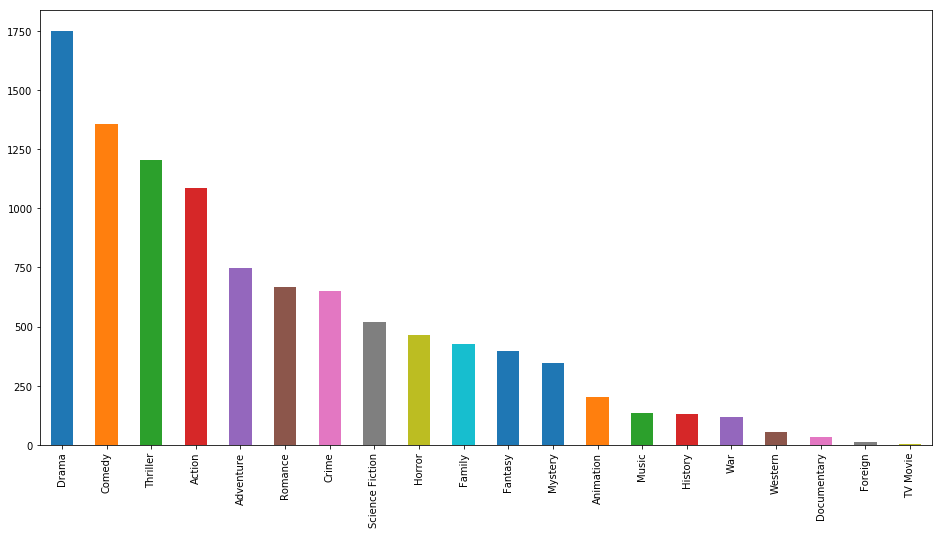

In [26]:
merged_df['genre'].value_counts().plot(kind='bar', figsize=(16, 8));

From the above chart, we can see all the different genre types and the frequency in which that type occurs in the data. The next process is to consider how to organise the data.

To do this, we take the genres and group by the release year while calculating the mean popularity in that group. That way we can view the relationship between annual average popularity per genre across the years available.

In [27]:
def group_years(genre_name):
    """
    This function takes in a string that identifies the target
    column in merged_df, groups the data by release_year and 
    calculates the average popularity. It then returns a dataframe
    with two columns: release_year and the avergae popularity of the 
    input genre.
    """
    # filter for the genre value that we are targeting
    genre = merged_df[merged_df['genre'] == genre_name].copy()
    # drop the genre column as it's now extraneous
    genre.drop(['genre'], axis=1, inplace=True)
    # group by release_year and calculate the mean
    popularity_mean = genre.groupby(['release_year']).mean().reset_index()
    # rename the popularity column to include the genre name
    popularity_mean.rename(columns={'popularity':'popularity_' + genre_name.lower()}, inplace=True)
    return popularity_mean

In [28]:
# run the function against all the genre columns
# and store against a variable
drama_popularity = group_years('Drama')
comedy_popularity = group_years('Comedy')
thriller_popularity = group_years('Thriller')
action_popularity = group_years('Action')
romance_popularity = group_years('Romance')
horror_popularity = group_years('Horror')
adventure_popularity = group_years('Adventure')
crime_popularity = group_years('Crime')
family_popularity = group_years('Family')
scifi_popularity = group_years('Science Fiction')
fantasy_popularity = group_years('Fantasy')
mystery_popularity = group_years('Mystery')
animation_popularity = group_years('Animation')
documentary_popularity = group_years('Documentary')
music_popularity = group_years('Music')
history_popularity = group_years('History')
war_popularity = group_years('War')
foreign_popularity = group_years('Foreign')
tv_popularity = group_years('TV Movie')
western_popularity = group_years('Western')

Merge all of the above into a new dataframe to plot the lines.

In [29]:
# Step through and merge each one in turn into a single df
genre_merge = pd.merge(drama_popularity, comedy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, thriller_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, action_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, romance_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, horror_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, adventure_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, crime_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, family_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, scifi_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, fantasy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, mystery_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, animation_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, documentary_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, music_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, history_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, war_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, foreign_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, tv_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, western_popularity, on='release_year', how='left')
# check the first result to see that we have all the expected columns
genre_merge.head(1)

,release_year,popularity_drama,popularity_comedy,popularity_thriller,popularity_action,popularity_romance,popularity_horror,popularity_adventure,popularity_crime,popularity_family,...,popularity_fantasy,popularity_mystery,popularity_animation,popularity_documentary,popularity_music,popularity_history,popularity_war,popularity_foreign,popularity_tv movie,popularity_western
0,1960,1.564871,0.501564,2.610362,1.504538,0.501564,2.610362,1.872132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.136943,NaN,NaN,NaN,1.872132


***
To begin comparing the data, I have chosen to view these on a line plot. Since rendering 20 lines on a single graph may be difficult to view clearly, I have split these into 5 initial plots. To decide on which to initially show together, I have taken the 20 genres in the bar graph, divided them equally into 5 before selecting the 1st from each group for my first line plot, the 2nd from each group for my second line plot, and so on.
***

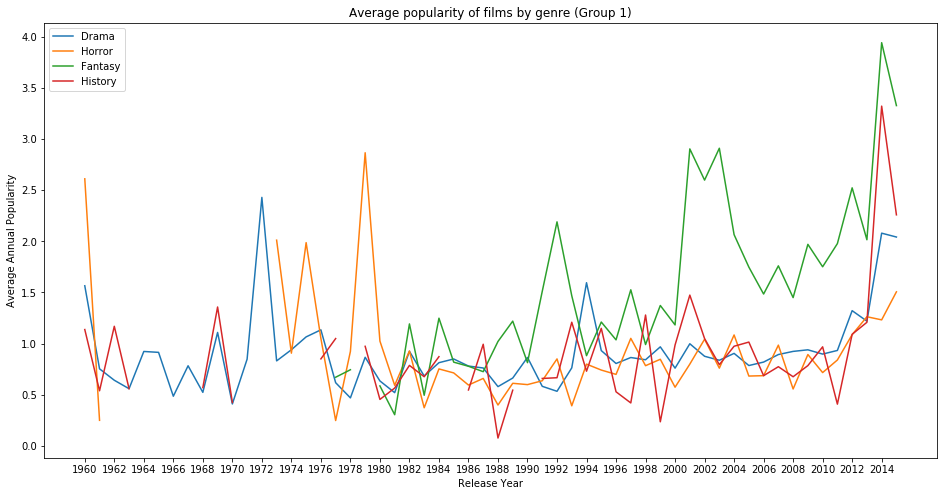

In [30]:
# group 1: drama, horror, fantasy and history
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 1)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_drama', data=genre_merge, label="Drama")
ax.plot('release_year', 'popularity_horror', data=genre_merge, label="Horror")
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_history', data=genre_merge, label="History")
ax.legend(loc='upper left');

***
### Group 1
The first standout is the fantasy genre, with some early peaks and a strong trend upwards from around 1987. The other three are not so clear, though the drama genre has generally climbed steadily and more smoothly in popularity since the beginning. Horror, while generally climbing in popularity across the years, starts to begin a decline around 1990s.
***

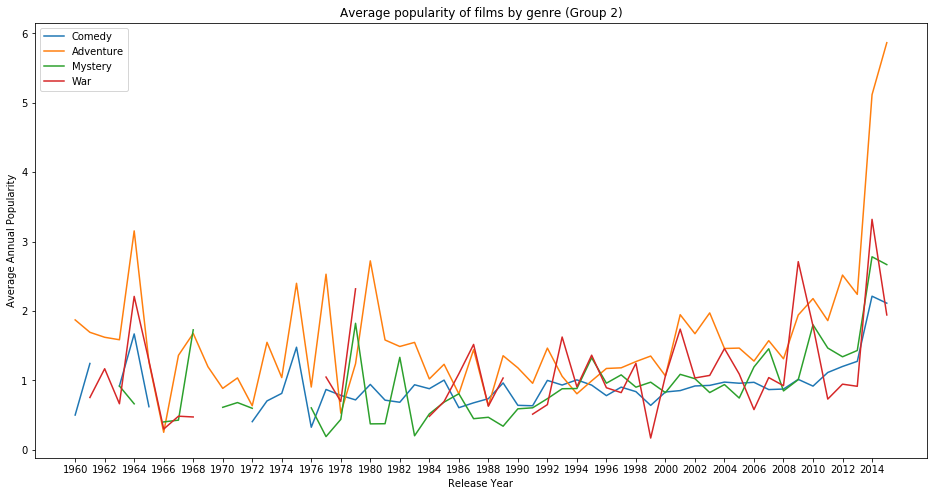

In [31]:
# group 2: comedy, adventure, mystery, war
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 2)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_comedy', data=genre_merge, label="Comedy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_war', data=genre_merge, label="War")
ax.legend(loc='upper left');

In [32]:
# compare close line graphs
genre_merge.loc[:, ['popularity_mystery', 'popularity_war']].mean()

popularity_mystery    0.944155
popularity_war        1.113672
dtype: float64

***
### Group 2
Comedy appears to be the least popular within this group and generally tracks below adventure and war. Mystery has a strong peak in 1968, but can be seen to be less popular than adventure and of a comparable popularity with war.

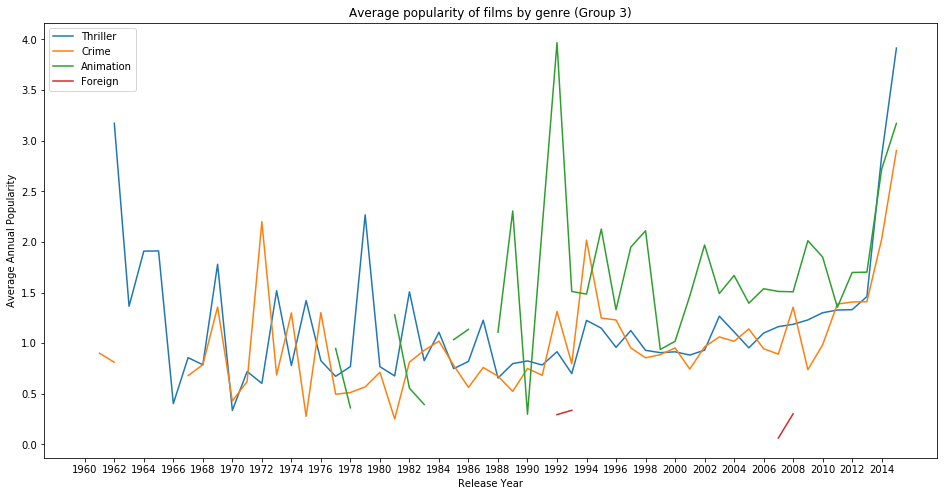

In [33]:
# group 3: thriller, crime, animation, foreign
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 3)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_thriller', data=genre_merge, label="Thriller")
ax.plot('release_year', 'popularity_crime', data=genre_merge, label="Crime")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_foreign', data=genre_merge, label="Foreign")
ax.legend(loc='upper left');

In [34]:
# compare close line graphs
genre_merge.loc[:, ['popularity_thriller', 'popularity_crime']].mean()

popularity_thriller    1.204792
popularity_crime       0.985926
dtype: float64

***
### Group 3
The lack of data points makes the foreign genre hard to compare, so for this analysis we will dicsount it. Animation also lacks some data points around the 1960s and early 1970s and sporadically between 1975 and 1981, however where it does occur it gives a strong indication that this is a popular genre. Thriller and crime generally track quite similarly to each other, with thriller edging only slightly above.
***

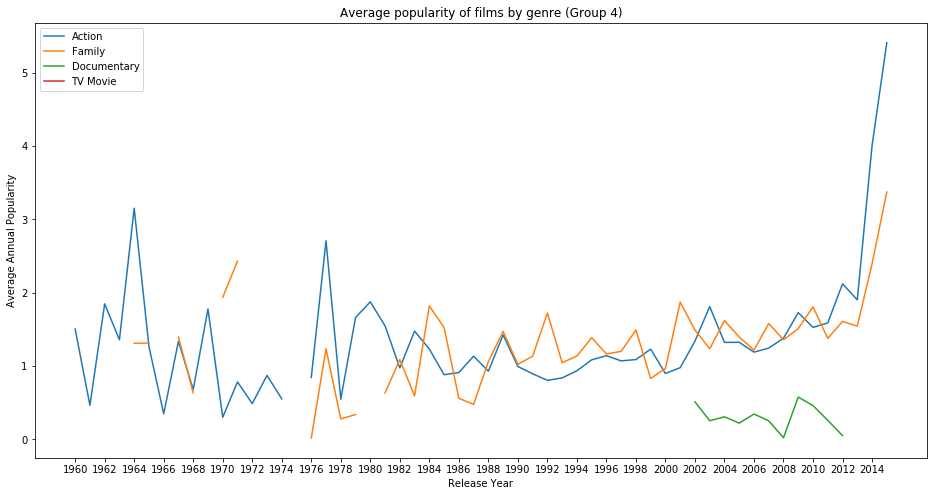

In [35]:
# group 4: action, family, documentary, tv movie
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 4)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_documentary', data=genre_merge, label="Documentary")
ax.plot('release_year', 'popularity_tv movie', data=genre_merge, label="TV Movie")
ax.legend(loc='upper left');

In [36]:
# compare close line graphs
genre_merge.loc[:, ['popularity_action', 'popularity_family']].mean()

popularity_action    1.358945
popularity_family    1.326674
dtype: float64

***
### Group 4
Again, we have a situation where some genres (documentary and tv movie) are lacking too many data points, though even with the data we have, they are tracking low against the others. Action and family are both strong in this group, with action (when comparing the average popularity of both genres across all years) suggesting to be more popular with audiences overall.
***

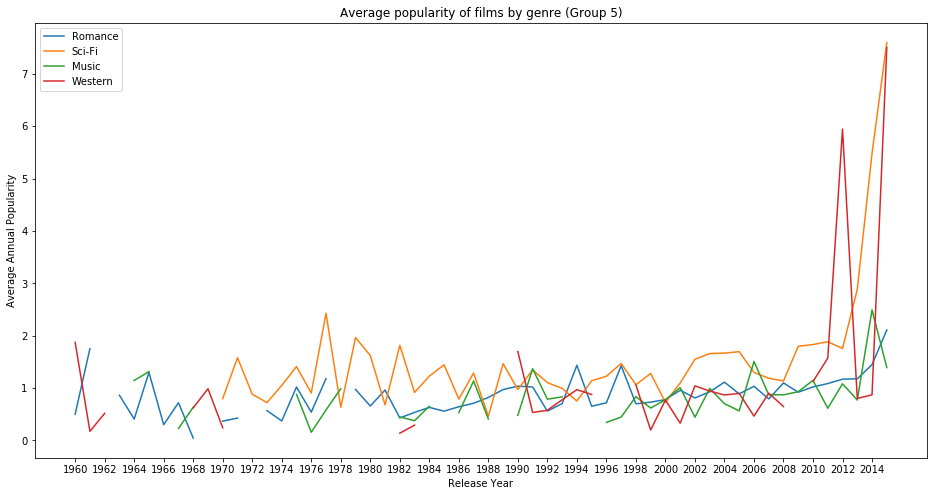

In [37]:
# group 5: romance, sci-fi, music, western
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 5)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_romance', data=genre_merge, label="Romance")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_music', data=genre_merge, label="Music")
ax.plot('release_year', 'popularity_western', data=genre_merge, label="Western")
ax.legend(loc='upper left');

In [38]:
# compare close line graphs
genre_merge.loc[:, ['popularity_romance', 'popularity_music']].mean()

popularity_romance    0.856773
popularity_music      0.814722
dtype: float64

***
### Group 5
Science fiction is the strongest contender in this group, while the western genre has too many data points missing. While romance and music appear to track quite similarly on the graph, it is only when we also look at their overall popularity through the years that we see that romance is generally higher.
***

***
### The Final Graph
The final graph will take a look at the most popular in each group and compare these together:
***

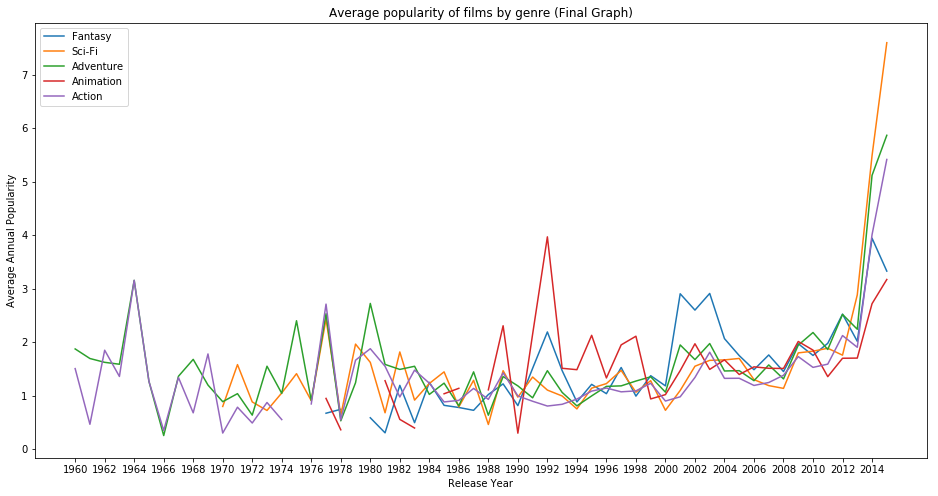

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Final Graph)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.legend(loc='upper left');

In [40]:
# compare close line graphs
genre_merge.loc[:, ['popularity_animation', 'popularity_action', 'popularity_science fiction', 'popularity_fantasy', 'popularity_adventure']].mean()

popularity_animation          1.652213
popularity_action             1.358945
popularity_science fiction    1.507577
popularity_fantasy            1.554536
popularity_adventure          1.592674
dtype: float64

### Question 2 : Distribution of Popularity in Different Revenue Levels in Recent Five Years
The aim is to find out the distribution of popularit in terms of different revenue levels. This means I can see what popularity corresponds to which revenue levels. Due to the revenue data containing a wide range, to be more specific, I divided the revenue data into four levels: Low', 'Medium', 'Moderately High', 'High' according to their quartile. Also I choose the recent five years data to dicuss in order to focus on the current data feature.

For the further usage of the level-diveded procedure with quartile, I build a cut_into_quantile function to divided data into four levels according to their quartile: 'Low', 'Medium', 'Moderately High', 'High'.

The cut_into_quantile function-

In [41]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [42]:
#choose the recent five years 
dfyear =[2011,2012,2013,2014,2015]
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = data.query('release_year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(dfn,'revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 3372 to 583
Data columns (total 20 columns):
id                      861 non-null int64
imdb_id                 861 non-null object
popularity              861 non-null float64
budget                  861 non-null int64
revenue                 861 non-null int64
original_title          861 non-null object
cast                    861 non-null object
director                861 non-null object
keywords                818 non-null object
overview                861 non-null object
runtime                 861 non-null int64
genres                  861 non-null object
production_companies    857 non-null object
release_date            861 non-null object
vote_count              861 non-null int64
vote_average            861 non-null float64
release_year            861 non-null int64
budget_adj              861 non-null float64
revenue_adj             861 non-null float64
revenue_levels          861 non-null category
dtypes: cate

C:\Users\Muskaan Baveja\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Now we can see we have created a revenue_levels column.

Then use the dataset to explore the popularity in each level each year.

In [43]:

# group the dataframe we created above with each revenue levels in each year, find the popularity meadian
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail(8)

id  popularity       budget      revenue  \
release_year revenue_levels                                                    
2014         Low              241543.5    0.751624    5500000.0    2440417.5   
             Medium           227735.0    0.981740   15000000.0   34077920.0   
             Moderately High  216282.0    1.805954   40000000.0  106645357.0   
             High             138103.0    3.813740  120000000.0  362637473.0   
2015         Low              273688.0    0.695024    9250000.0    3172497.0   
             Medium           276254.0    1.696682   16000000.0   36738078.5   
             Moderately High  267442.5    2.035523   30000000.0   94629376.0   
             High             215385.5    5.184985  103500000.0  350398577.0   

                              runtime  vote_count  vote_average    budget_adj  \
release_year revenue_levels                                                     
2014         Low                100.0       193.0          6.15  5.066001e+06   
             Medium             106.0       377.0          6.20  1.381637e+07   
             Moderately High    106.0       720.0          6.20  3.684364e+07   
             High               113.0      2169.0          6.80  1.105309e+08   
2015         Low                101.5       146.5          5.70  8.509996e+06   
             Medium             106.0       470.5          6.20  1.471999e+07   
             Moderately High    114.0       720.0          6.30  2.759999e+07   
             High               120.5      1882.0          6.70  9.521996e+07   

                               revenue_adj  
release_year revenue_levels                 
2014         Low              2.247847e+06  
             Medium           3.138887e+07  
             Moderately High  9.823008e+07  
             High             3.340221e+08  
2015         Low              2.918696e+06  
             Medium           3.379902e+07  
             Moderately High  8.705899e+07  
             High             3.223665e+08

### Then plot a bar chart.

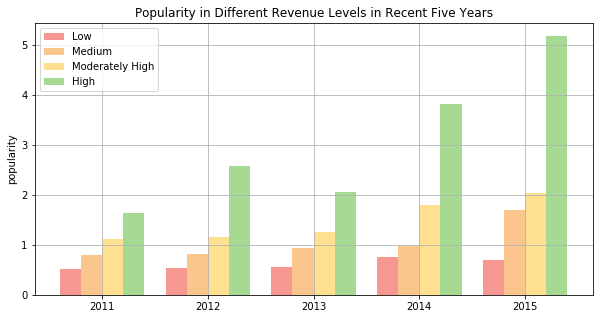

In [44]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['popularity'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('popularity')

# Set the chart's title
ax.set_title('Popularity in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

### We can see that movies with higher revenue level are with higher popularity in recent five years.

We can see that revenue level has postive relation with popularity. The result is reasonable.
So according to the result from the data analysis, I infer that a high revenue movie is always with a higher popularity than movies with lower revenue levels.

In [45]:
genre_merge.head()

,release_year,popularity_drama,popularity_comedy,popularity_thriller,popularity_action,popularity_romance,popularity_horror,popularity_adventure,popularity_crime,popularity_family,...,popularity_fantasy,popularity_mystery,popularity_animation,popularity_documentary,popularity_music,popularity_history,popularity_war,popularity_foreign,popularity_tv movie,popularity_western
0,1960,1.564871,0.501564,2.610362,1.504538,0.501564,2.610362,1.872132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.136943,NaN,NaN,NaN,1.872132
1,1961,0.753022,1.244521,NaN,0.464139,1.752027,0.249542,1.693268,0.900245,1.467885,...,NaN,NaN,2.631987,NaN,0.900245,0.538364,0.754548,NaN,NaN,0.173731
2,1962,0.641333,NaN,3.170651,1.848380,NaN,NaN,1.621842,0.810805,NaN,...,NaN,NaN,NaN,NaN,NaN,1.168767,1.168767,NaN,NaN,0.516593
3,1963,0.558673,0.920094,1.364218,1.357698,0.862313,1.139321,1.586280,NaN,NaN,...,NaN,0.920094,NaN,NaN,NaN,0.558673,0.664326,NaN,NaN,NaN
4,1964,0.922681,1.670163,1.908618,3.153791,0.408402,NaN,3.153791,0.663446,1.310850,...,1.987819,0.663446,NaN,NaN,1.144632,NaN,2.210475,NaN,NaN,NaN


### Question 3 : Top Movies Based on their Revenue
The following code snippet produce the barplot representing the top 10 movies based on their adjusted revenue.

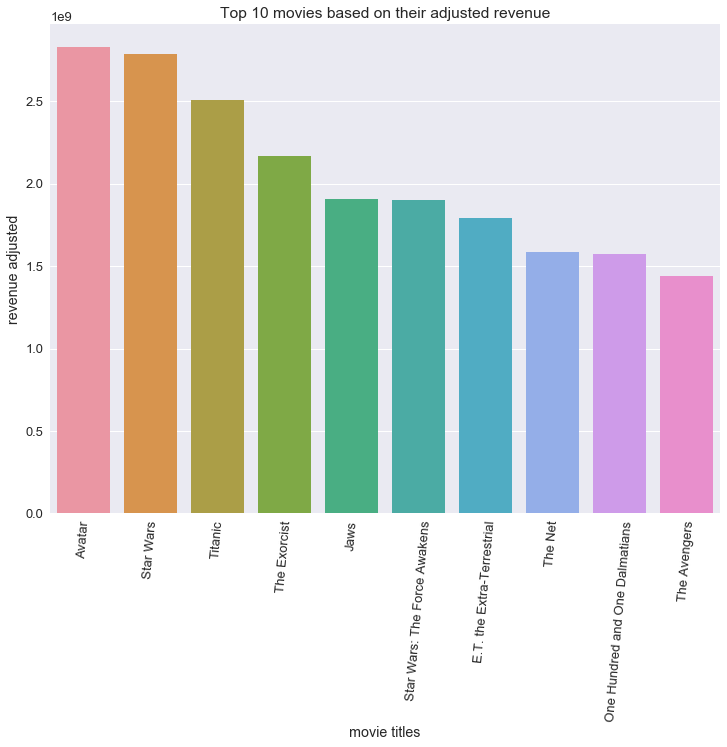

In [46]:
#Top Movies Based on their Revenue
revenue_dict = {}


movies_and_revenue = data[["original_title", "revenue_adj"]]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

### Question 4 : Movies with longest and shortest runtime values

In [47]:
def calculate(column):
    #for highest runtime
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest runtime
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

In [48]:
calculate('runtime')

,2107,5162
id,43434,24914
imdb_id,tt1321865,tt0368574
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
overview,"The story of Venezuelan revolutionary, Ilich R...",A high school student is haunted by thoughts o...


>Column with id 2107 shows the longest runtime i.e 338 minutes.
>
>Whereas the column with id 5162 shows the shortest runtime i.e 15 minutes

<a id='conclusions'></a>
## Conclusions

The goal in the research was primarily to explore the four questions.
***
Question 1:
The result showed that animation was the most popular genre of movies across the years. It was closely followed by the genres of adventure, fantasy, science fiction and action. These 5 were the most popular genres.
***
Question 2:
We analysed data from the past five years and found that movies having greater revenue(classified based on our quarantile distinction), received greater popularity scores.
***
Question 3:
We found the top 10 movies. The criteria for their selection was revenue adjusted.
***
Question 4:
We found movies that had the longest and shortest runtime and displayed them along with their other useful information.
***

## Bibliography

  * https://carlyhochreiter.files.wordpress.com/2018/05/investigating-movie-dataset.pdf
  * pandas.pydata.org
  * www.programiz.com
  * github.com